In [1]:
import sys
from os.path import expanduser

# Add path to folder containing safepy
sys.path.append(expanduser('~') + '/Lab/Utils/Python/Networks/safepy/')

import safe

%matplotlib inline

# Example 1 -- Annotating the genetic interaction similarity network

In this example, SAFE is run with all the default settings:
* the network is the genetic interaction similarity network from Costanzo et al., 2016
* the attribute is a doxorubicin sensitivity screen from Hoepfner et al., 2014

In [2]:
sf = safe.SAFE()

In [3]:
sf.load_network()

Loading network from /media/Data1/projects/safe-data/networks/Costanzo_Science_2016.gpickle


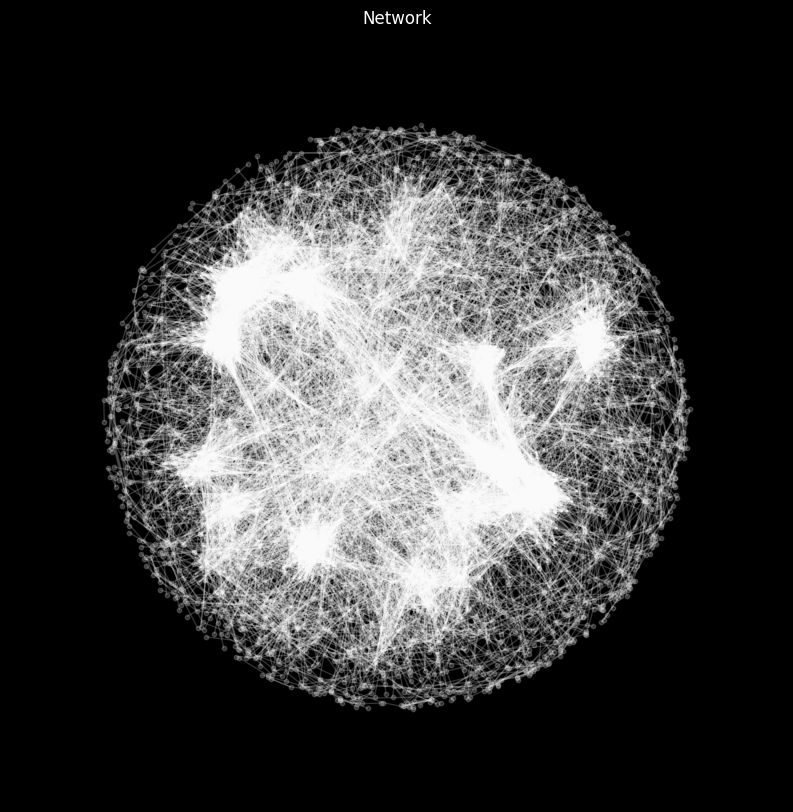

In [4]:
sf.plot_network()

In [5]:
sf.define_neighborhoods()

Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.10 x diameter
Number of nodes per neighborhood (mean +/- std): 37.50 +/- 56.74


In [6]:
sf.load_attributes()

Loading attributes from /media/Data1/projects/safe-data/attributes/go_bp_140819.txt

Attribute data provided: 5911 labels x 4373 attributes
YAL003W, YAL005C, YAL014C and 2449 other labels in the attribute file were not found in the network.

Attribute data mapped onto the network: 3459 labels x 4373 attributes
Values: 795886 NaNs
Values: 16405921 zeros
Values: 163376 positives
Values: 0 negatives


In [7]:
# # Alternatively to the default attribute, you can specify an attribute file to be used instead of the default settings:
# # For format specifications, check the example attribute file. The main format requirements are:
# # * the first column contains the node labels (in this case, yeast ORFs)
# # * each column is an attribute
    
# sf.load_attributes(attribute_file='hoepfner_movva_2014_doxorubucin.txt')

In [18]:
import pandas as pd
# pd.DataFrame(sf.node2attribute)
# pd.DataFrame(sf.neighborhoods)

0     1     2     3     4     5     6     7     8     9     ...  4363  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3966   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3967   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3968   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3969   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3970   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      4364  4365  4366  4367  4368  4369  4370  4371  4372  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
3966   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3967   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3968   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3969   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3970   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[3971 rows x 4373 columns]

In [9]:
sf.compute_pvalues_by_randomization(num_permutations=100, processes=7)

Current settings (possibly overwriting global ones):
	num_permutations=100
	processes=7
Using randomization to calculate enrichment...


100%|██████████| 15/15 [01:54<00:00,  7.61s/it]


In [9]:
# Alternatively, run the same permutations in parallel using 8 cores on this machine
# sf.compute_pvalues(num_permutations=1000, processes=8)

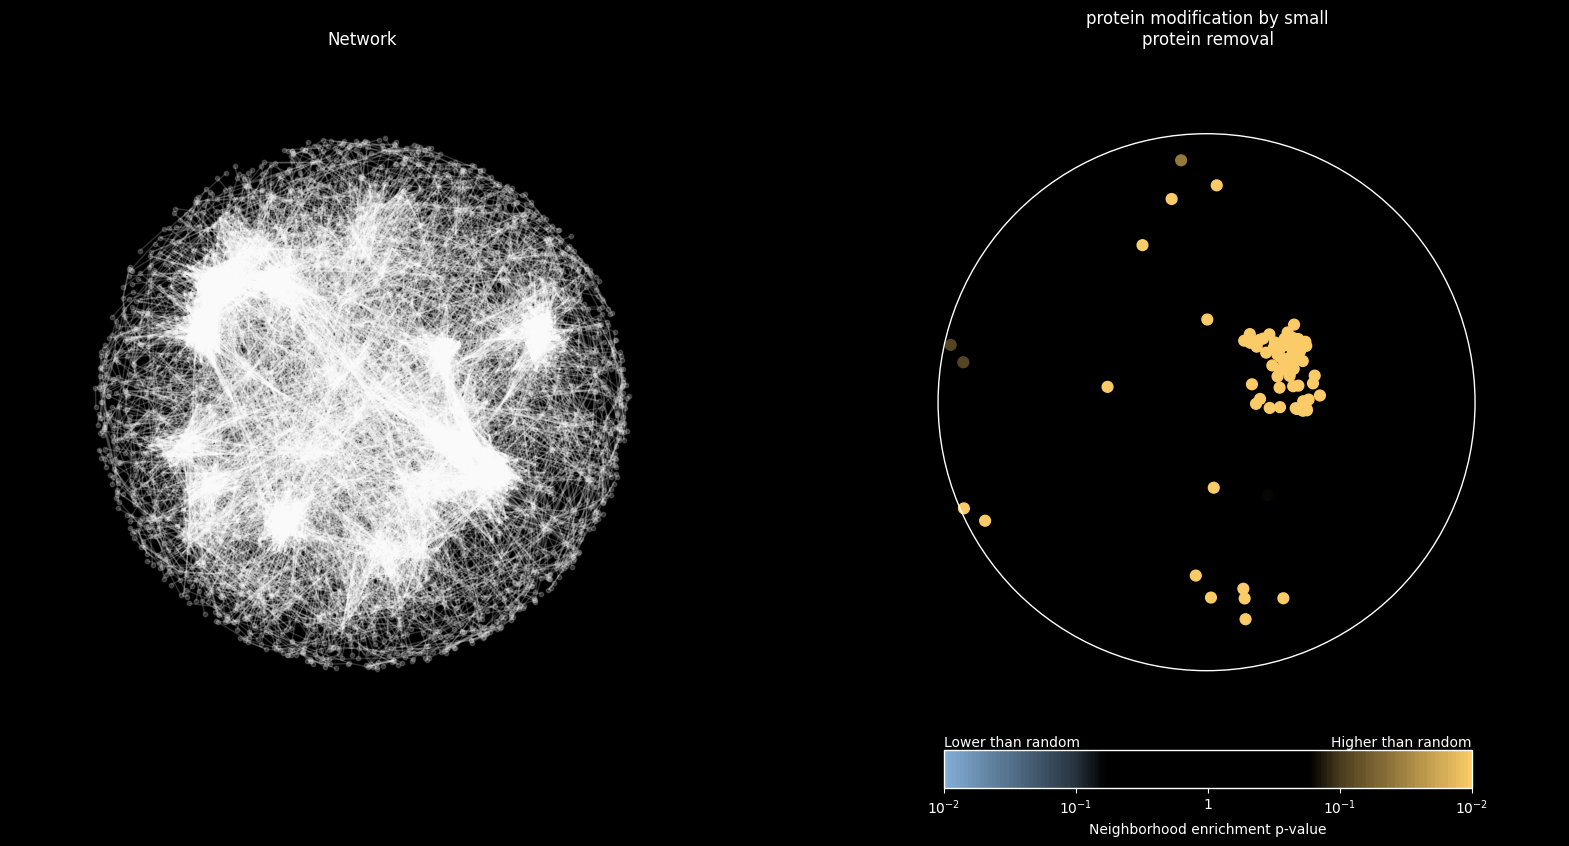

In [17]:
# Plot a random attribute
sf.plot_sample_attributes()

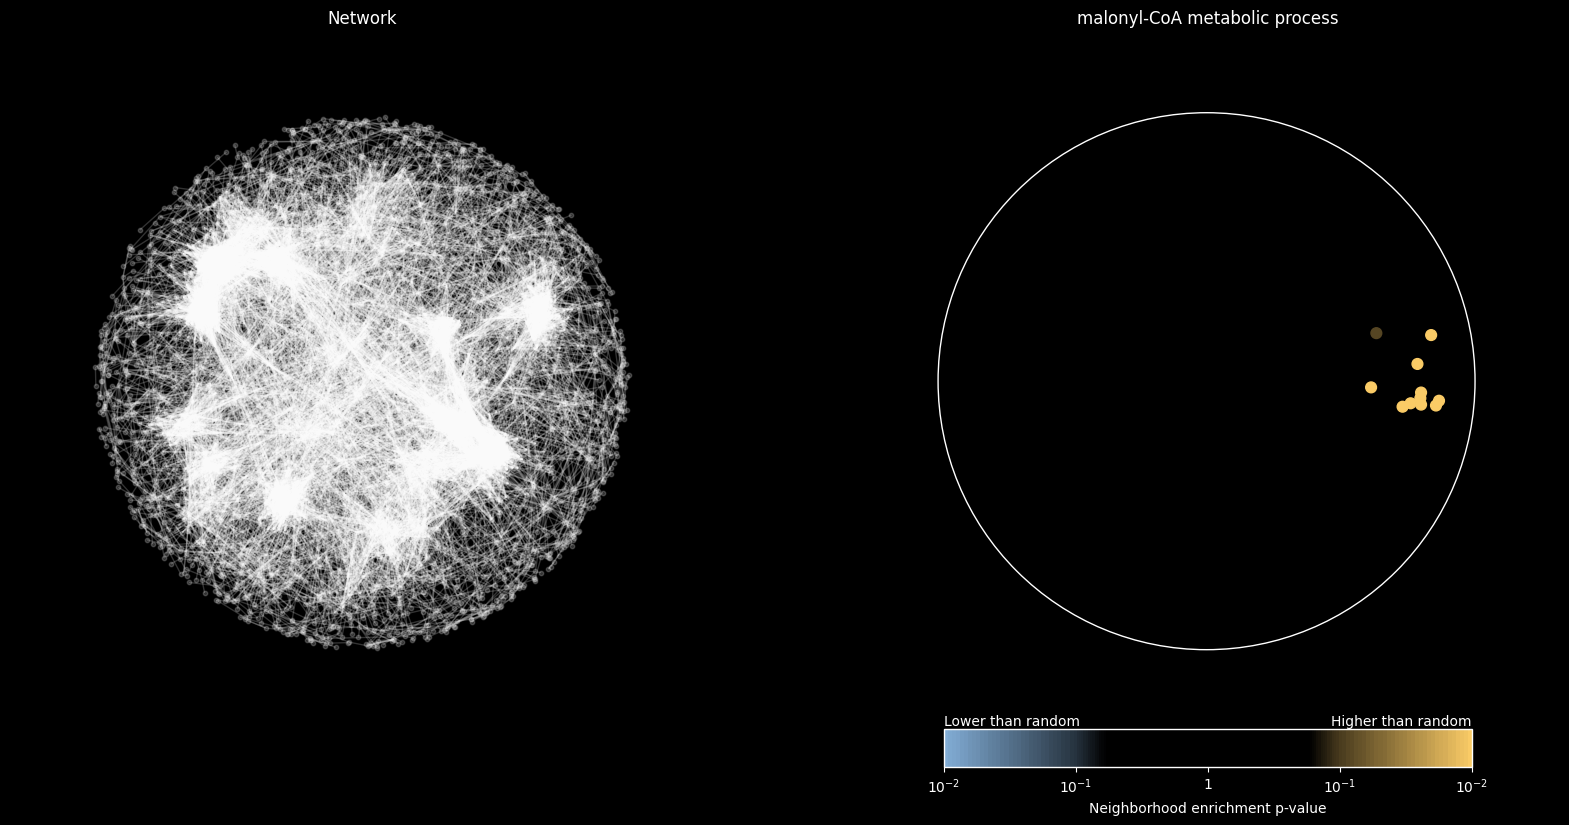

In [14]:
# Plot a specific attribute (Note: to get the list of available attributes, check sf.attributes.head())
sf.plot_sample_attributes(attributes=['malonyl-CoA metabolic process'])

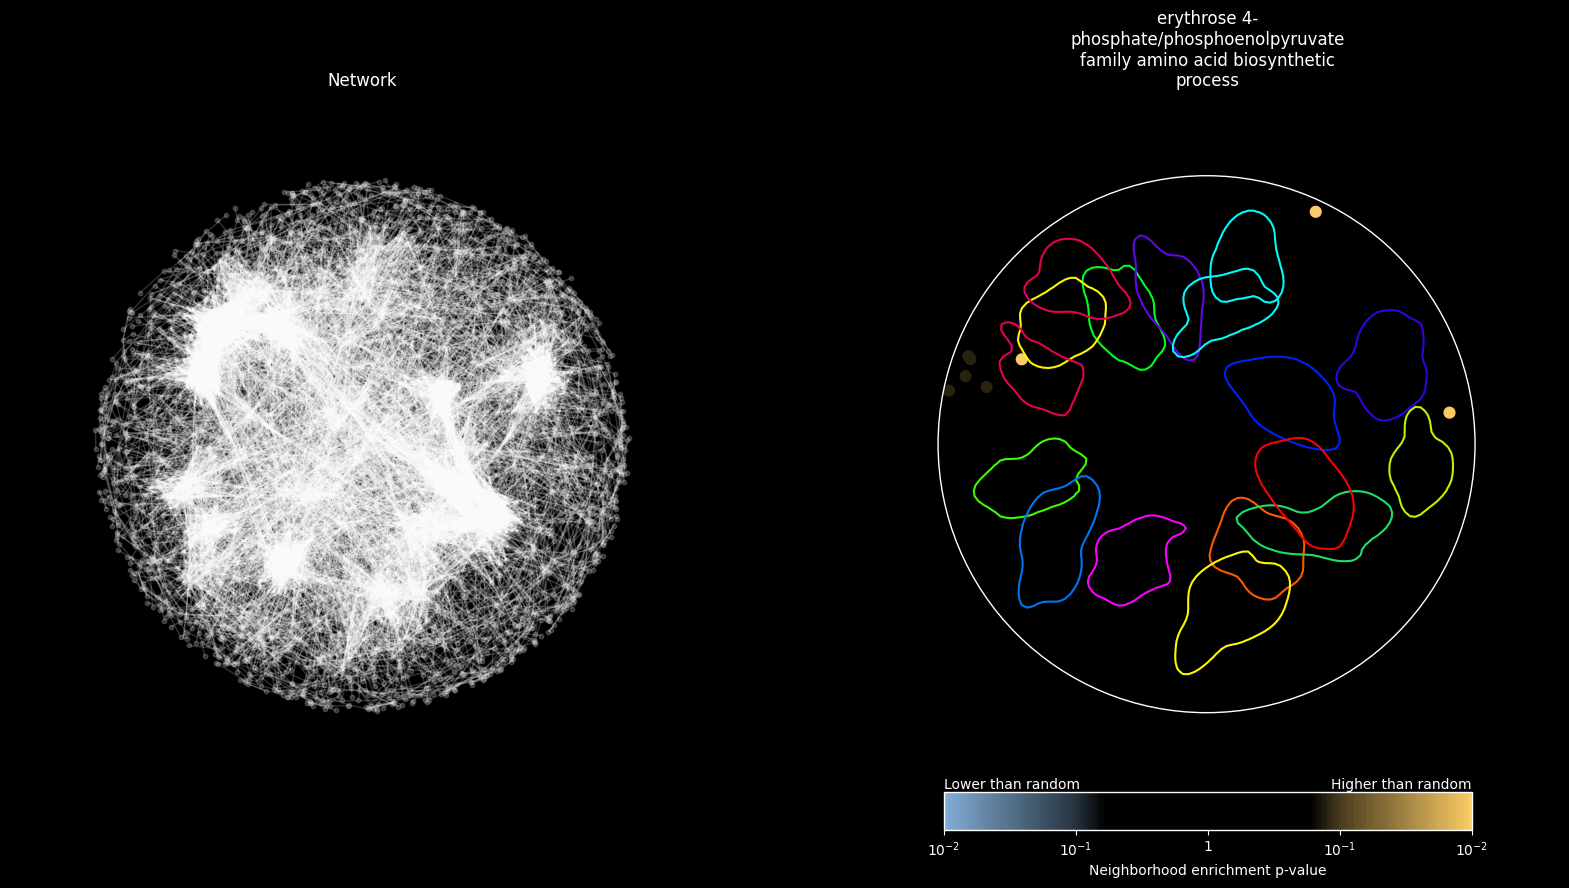

In [15]:
# Show the contours of the functional clusters from Costanzo et al., 2016
sf.plot_sample_attributes(show_costanzo2016=True)

TypeError: 'NoneType' object is not subscriptable

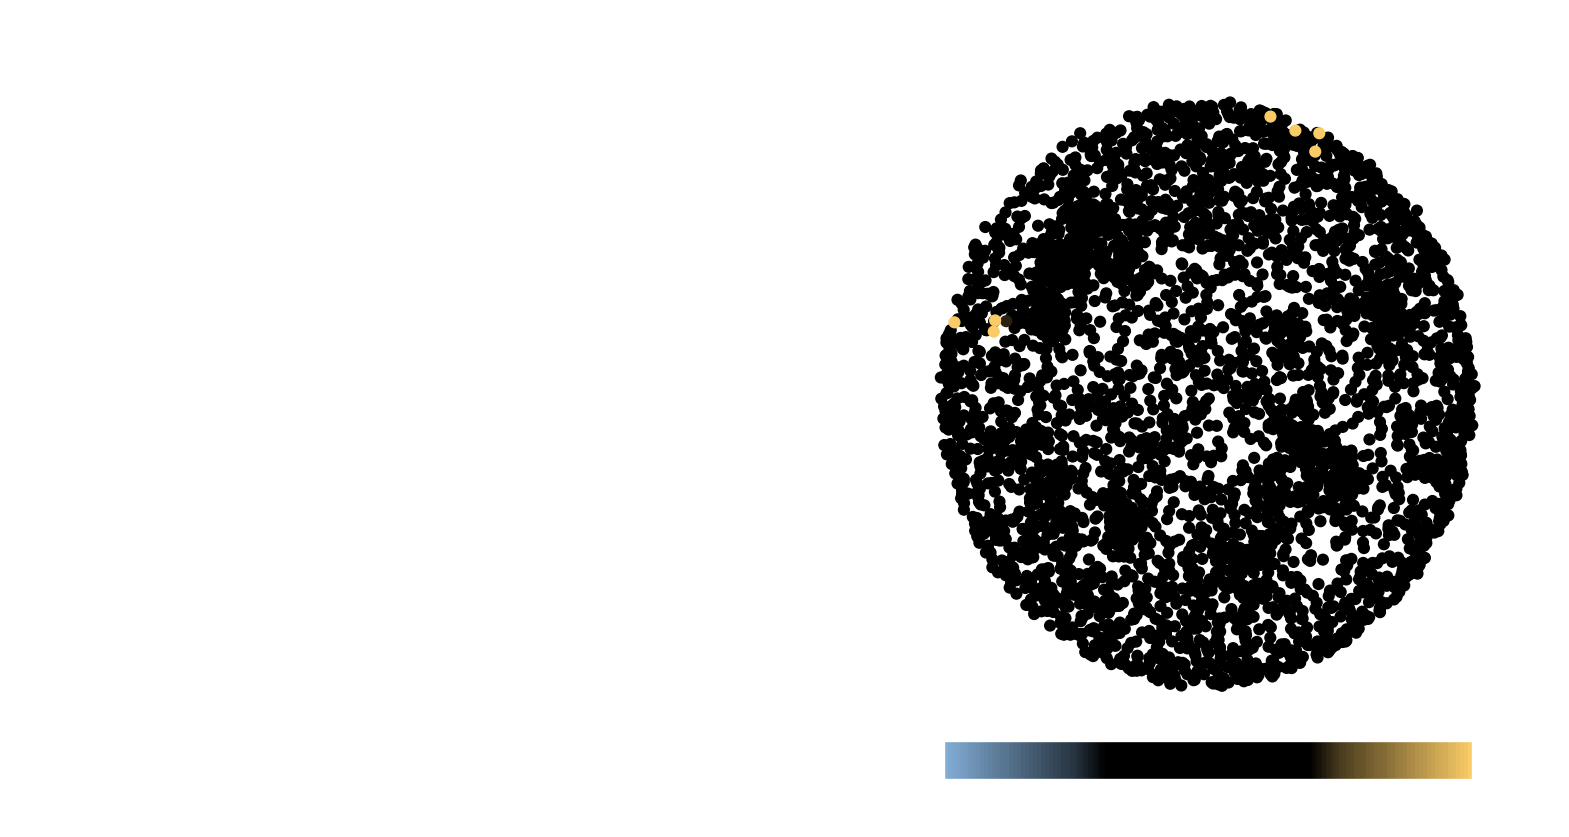

In [16]:
# Map the significant nodes
sf.plot_sample_attributes(show_costanzo2016=True, show_significant_nodes=True)

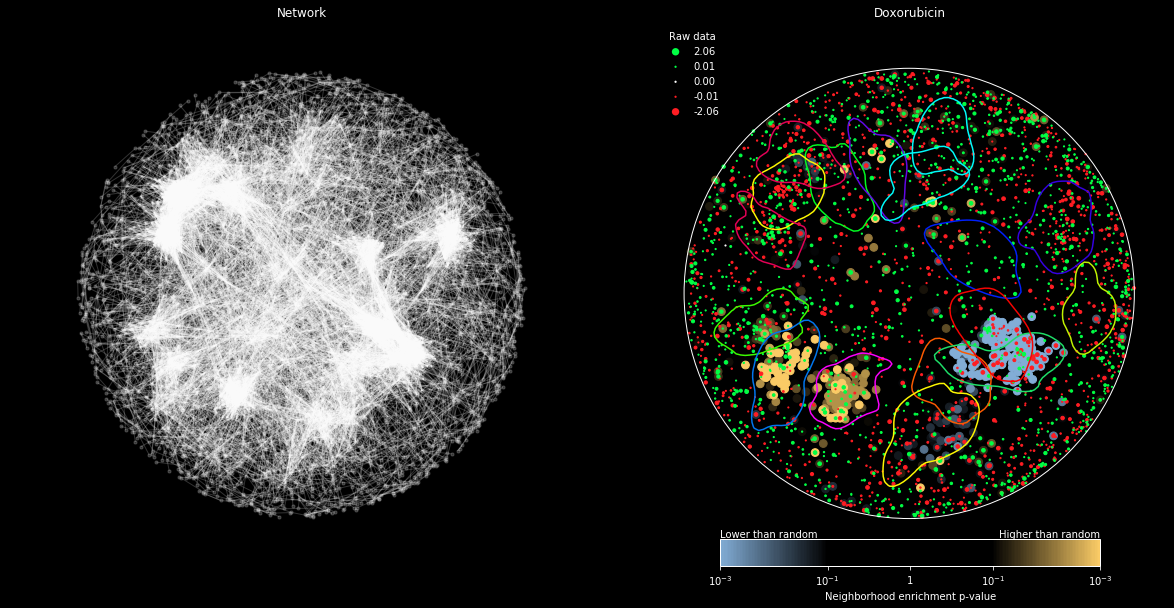

In [13]:
# Map the raw data onto the network
sf.plot_sample_attributes(show_costanzo2016=True, show_raw_data=True)

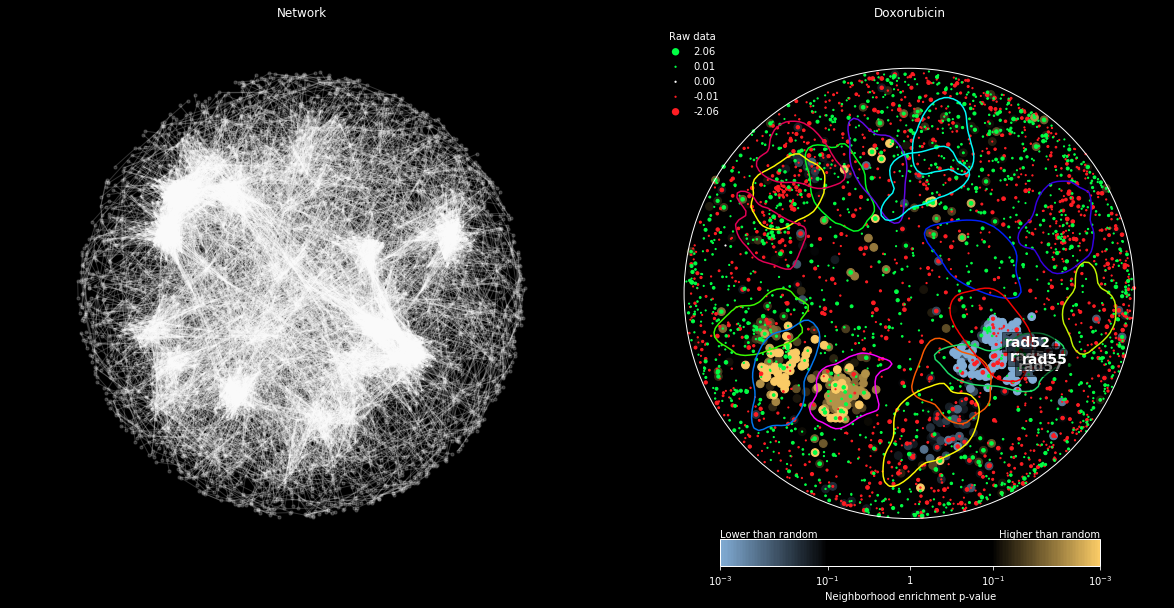

In [14]:
# Map a few labels onto the network
sf.plot_sample_attributes(show_costanzo2016=True, show_raw_data=True, labels=['rad54','rad57','rad55','rad52'])

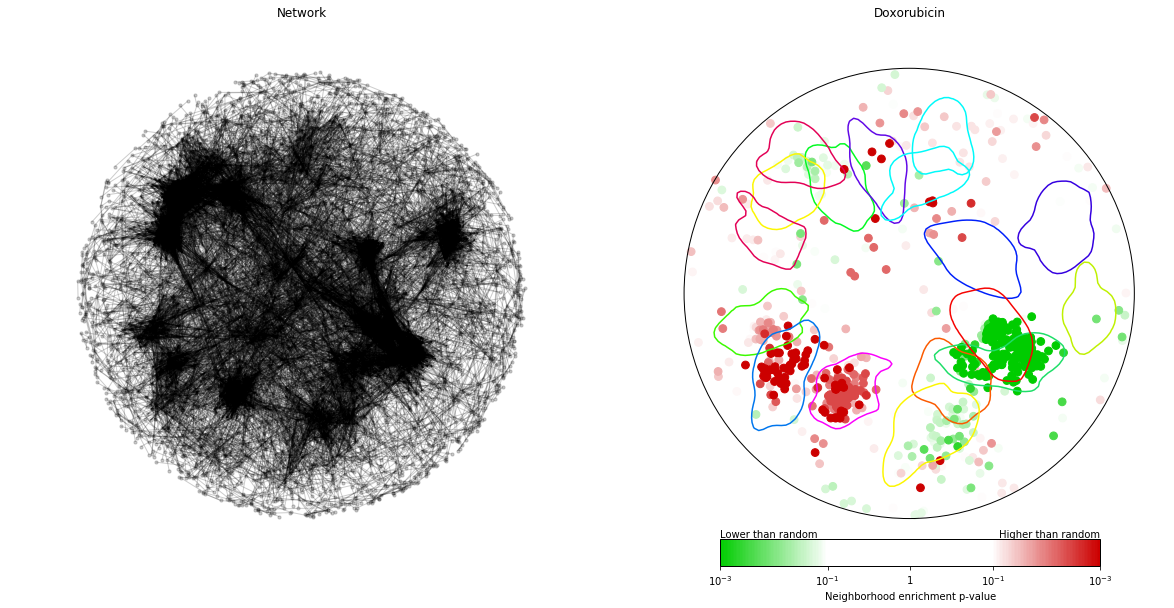

In [15]:
# Change the background color and the enrichment colors
sf.plot_sample_attributes(show_costanzo2016=True, background_color='#ffffff', colors=['00cc00','cc0000'])

Output path: ./doxorubicin.pdf


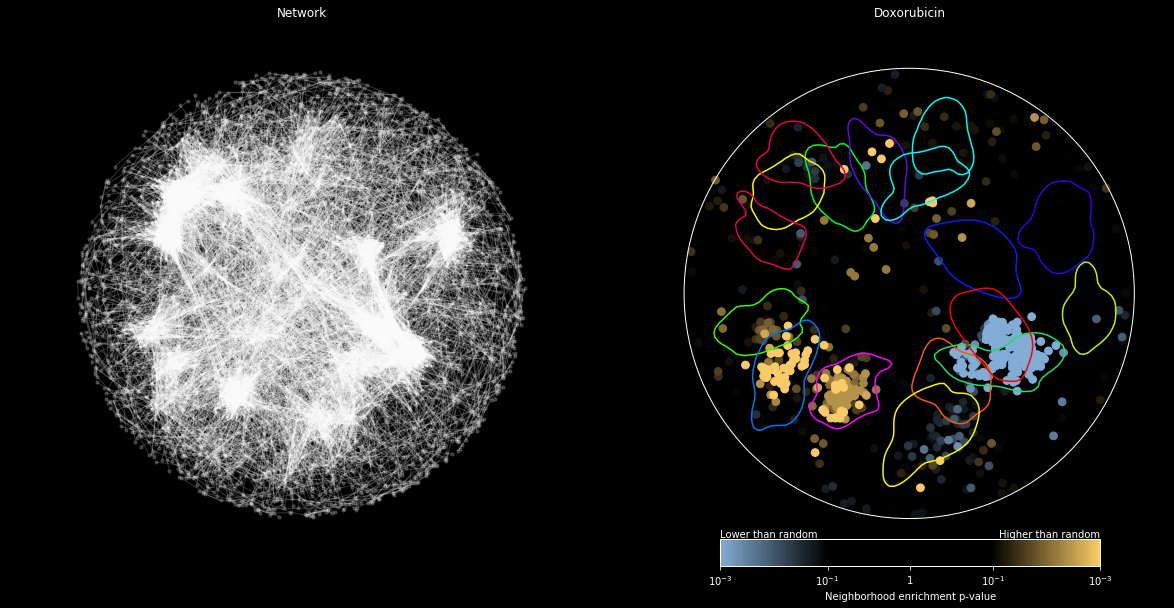

In [18]:
# Show the figure and save it to a PDF file
sf.plot_sample_attributes(show_costanzo2016=True, save_fig='doxorubicin.pdf')

In [17]:
# Print output files into the current directory
sf.print_output_files(output_dir='./')

./attribute_properties_annotation.txt
./node_properties_annotation.txt
